## Confidence interval for the proportion of variance : assume a beta distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sst
from __future__ import print_function

In [2]:
# example of proportion of variance
propE = .42
propStd = .24
propVar = propStd*propStd

Match the two coeff of a beta:
http://en.wikipedia.org/wiki/Beta_distribution

$$
V(X) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta +1)}
\\
E(X) = \frac{\alpha}{(\alpha + \beta)}
$$

which gives us:

$$
\beta = \frac{\phi - a}{\psi a}
\\
\alpha = \phi \beta
\\
\textrm{With} \;\; \phi = \frac{E(x)}{1-E(x)} \textrm{ , }\;\; \psi = \phi + 1
\;\;  \textrm{, and} \;\;\; a = \psi^2 V(x)
$$

The problem is that we may end up with negative parameters for the beta distrib. That's not good ...
So, in that case - I fudge the parameters to keep the mean of the distribution correct  ... but the variance can be way off of course - so see the check 

In [3]:
def beta_param(E,V, fudge=True):
    """
    E: expected value (the mean)
    V: variance
    """
    
    phi = E/(1-E)
    psi = phi + 1
    a = psi**2 * V
    if fudge and (phi <= a):
        beta = .001    
        print("\n Possible heavy fudging \n")
    else:
        beta = (phi - a)/(psi * a)
    alpha = phi * beta
    return alpha, beta

def mean_var(alpha, beta):
    """
    mean and var of beta
    """
    E = alpha/(alpha + beta)
    alpbet = alpha + beta
    V = alpha*beta/(alpbet**2 * (alpbet +1))
    return E,V

In [4]:
(propE, propV) = (.42, .24**2)

# compute parameters of the beta distrib
al, bet = beta_param(propE, propV)

In [5]:
print("parameters alpha and betat of the distrib:",al,bet)

parameters alpha and betat of the distrib: 1.35625 1.87291666667


In [6]:
print(" approx mean and variance of the distrib: {:.4f},{:.4f}".format(*(mean_var(al, bet))))
print(" to be compared to: {:.4f},{:.4f}".format(propE, propV))

 approx mean and variance of the distrib: 0.4200,0.0576
 to be compared to: 0.4200,0.0576


now, what's a 95\% CI for this beta distrib ?

In [7]:
betadist = sst.beta(al,bet)

In [10]:
print("95% Confidence Interval = [{:3.2f} - {:3.2f}]".format(betadist.ppf(.025),betadist.ppf(.975)))
print("80% Confidence Interval = [{:3.2f} - {:3.2f}]".format(betadist.ppf(.1),betadist.ppf(.9)))

95% Confidence Interval = [0.04 - 0.89]
80% Confidence Interval = [0.11 - 0.76]


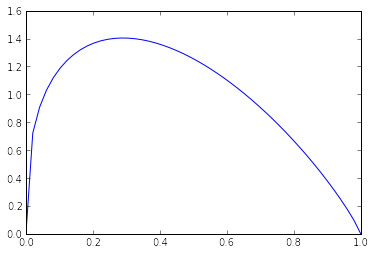

In [9]:
# plot the pdf to see how it looks ... 
x = np.linspace(0,1,50)
plt.plot(x, betadist.pdf(x))